# MNIST_Keras_Logistic Regression

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

## Loading data, Preprocessing

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
input_dim = 28*28
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
output_dim = nb_classes = 10

In [6]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [8]:
Y_train.shape

(60000, 10)

## LogisticRegression w Keras

In [29]:
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
batch_size = 128
nb_epoch = 100

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [31]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test error', score[0])
print('Test accuracy', score[1])

c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 28us/step - loss: 1.2640 - accuracy: 0.7078 - val_loss: 0.8075 - val_accuracy: 0.8334
Epoch 2/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.7121 - accuracy: 0.8428 - val_loss: 0.6049 - val_accuracy: 0.8646
Epoch 3/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.5843 - accuracy: 0.8611 - val_loss: 0.5243 - val_accuracy: 0.8732
Epoch 4/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.5231 - accuracy: 0.8703 - val_loss: 0.4791 - val_accuracy: 0.8795
Epoch 5/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.4859 - accuracy: 0.8764 - val_loss: 0.4491 - val_accuracy: 0.8851
Epoch 6/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.4604 - accuracy: 0.8805 - val_loss: 0.4280 - val_accuracy: 0.8894
Epoch 7/100
60000/60000 [==============================] - 1s 

Epoch 56/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.3056 - accuracy: 0.9151 - val_loss: 0.2957 - val_accuracy: 0.9177
Epoch 57/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.3050 - accuracy: 0.9156 - val_loss: 0.2955 - val_accuracy: 0.9176
Epoch 58/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.3044 - accuracy: 0.9156 - val_loss: 0.2949 - val_accuracy: 0.9182
Epoch 59/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3037 - accuracy: 0.9158 - val_loss: 0.2944 - val_accuracy: 0.9187
Epoch 60/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3032 - accuracy: 0.9159 - val_loss: 0.2939 - val_accuracy: 0.9186
Epoch 61/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3026 - accuracy: 0.9160 - val_loss: 0.2934 - val_accuracy: 0.9184
Epoch 62/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3020 - accuracy: 0.9165

In [24]:
model2 = Sequential()
model2.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
batch_size = 128
nb_epoch = 100

In [25]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
score2 = model2.evaluate(X_test, Y_test, verbose=0)
print('Test error', score2[0])
print('Test accuracy', score2[1])

c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.6938 - accuracy: 0.8245 - val_loss: 0.3863 - val_accuracy: 0.9023
Epoch 2/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.3633 - accuracy: 0.9021 - val_loss: 0.3210 - val_accuracy: 0.9150
Epoch 3/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.3199 - accuracy: 0.9125 - val_loss: 0.2987 - val_accuracy: 0.9173
Epoch 4/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.2996 - accuracy: 0.9169 - val_loss: 0.2837 - val_accuracy: 0.9217
Epoch 5/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.2879 - accuracy: 0.9202 - val_loss: 0.2780 - val_accuracy: 0.9229
Epoch 6/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2798 - accuracy: 0.9222 - val_loss: 0.2731 - val_accuracy: 0.9245
Epoch 7/100
60000/60000 [==============================] - 2s 

Epoch 56/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.2298 - accuracy: 0.9362 - val_loss: 0.2689 - val_accuracy: 0.9284
Epoch 57/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2294 - accuracy: 0.9371 - val_loss: 0.2699 - val_accuracy: 0.9289
Epoch 58/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.2293 - accuracy: 0.9370 - val_loss: 0.2699 - val_accuracy: 0.9282
Epoch 59/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2290 - accuracy: 0.9366 - val_loss: 0.2711 - val_accuracy: 0.9284
Epoch 60/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2288 - accuracy: 0.9370 - val_loss: 0.2703 - val_accuracy: 0.9280
Epoch 61/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.2281 - accuracy: 0.9370 - val_loss: 0.2726 - val_accuracy: 0.9273
Epoch 62/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2285 - accuracy: 0.9368

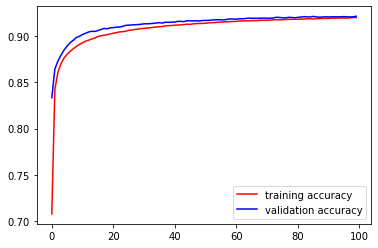

In [32]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

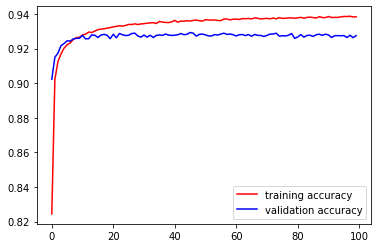

In [26]:
plt.plot(history2.history['accuracy'],'r')
plt.plot(history2.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

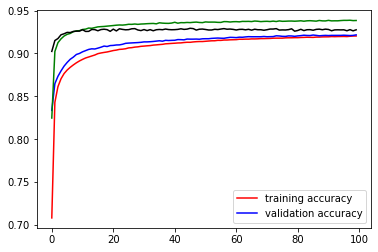

In [33]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.plot(history2.history['accuracy'],'g')
plt.plot(history2.history['val_accuracy'],'black')
plt.legend({'training accuracy':'g', 'validation accuracy': 'black'})
plt.show()

## Inference

In [34]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index += 1

NameError: name 'predictions' is not defined